In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid", palette="pastel")
plt.style.use("seaborn")


C:\Users\Administrator\AppData\Local\Temp\ipykernel_25308\2096753397.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display first few rows of each dataset
print("Customers Dataset:")
display(customers.head())
print("Products Dataset:")
display(products.head())
print("Transactions Dataset:")
display(transactions.head())


Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [3]:
# Convert dates to datetime format
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

# Merge datasets
merged_df = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

# Check merged data
print("Merged Dataset:")
display(merged_df.head())


Merged Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


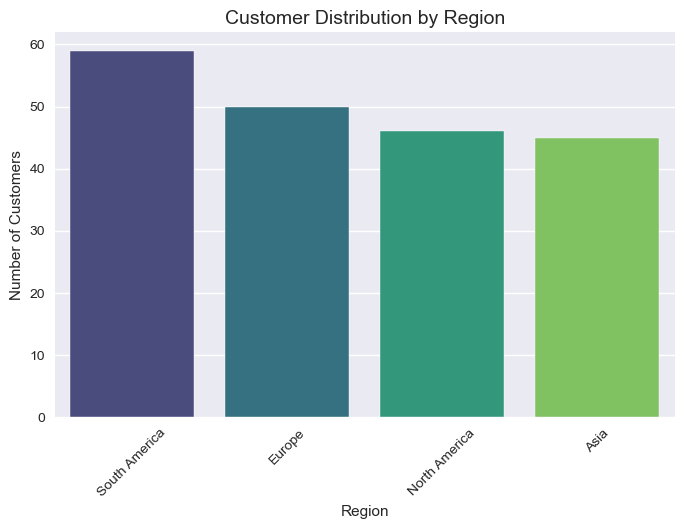

In [4]:
# Count customers by region
region_counts = customers["Region"].value_counts()

# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


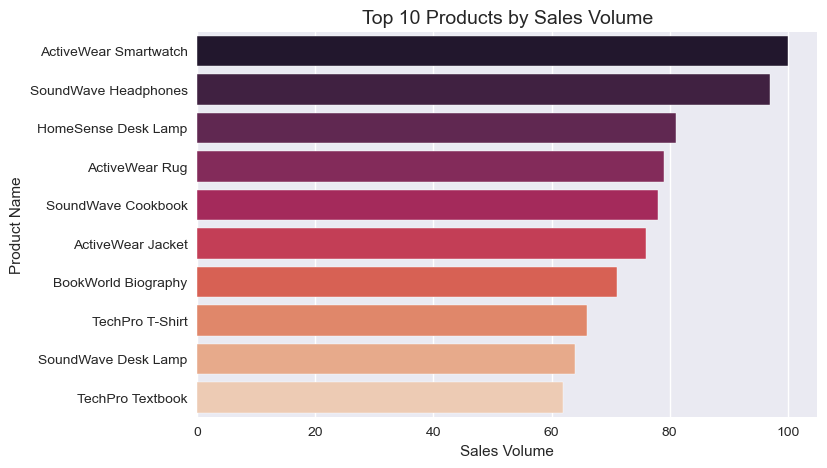

In [5]:
# Calculate top-selling products
top_products = merged_df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)

# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="rocket")
plt.title("Top 10 Products by Sales Volume", fontsize=14)
plt.xlabel("Sales Volume")
plt.ylabel("Product Name")
plt.show()


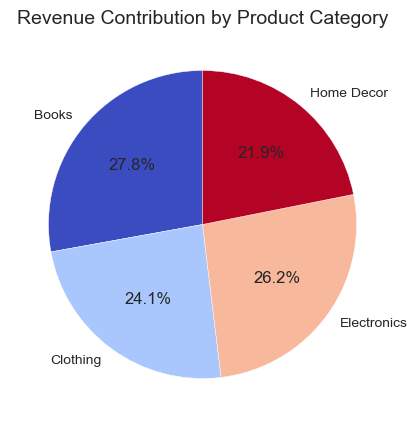

In [6]:
# Revenue by category
category_revenue = merged_df.groupby("Category")["TotalValue"].sum()

# Visualize
plt.figure(figsize=(8, 5))
category_revenue.plot(kind="pie", autopct="%.1f%%", startangle=90, colormap="coolwarm")
plt.title("Revenue Contribution by Product Category", fontsize=14)
plt.ylabel("")  # Remove default y-axis label
plt.show()


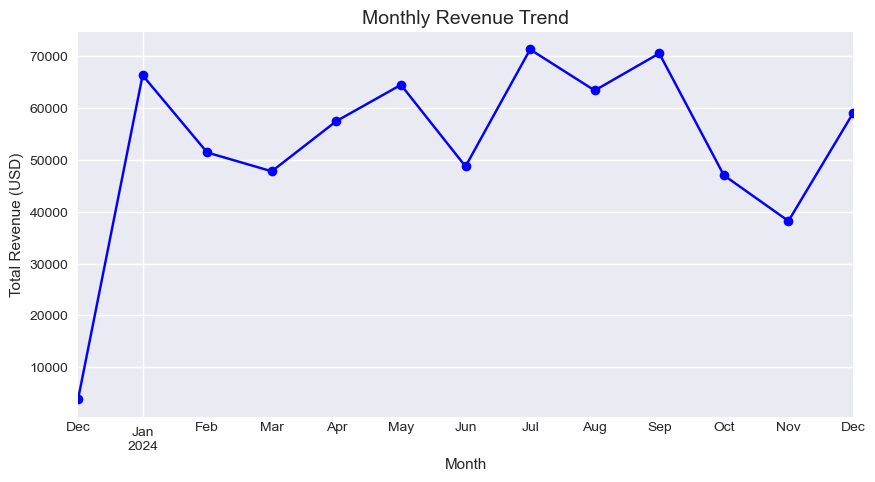

In [7]:
# Monthly revenue
merged_df["Month"] = merged_df["TransactionDate"].dt.to_period("M")
monthly_revenue = merged_df.groupby("Month")["TotalValue"].sum()

# Visualize
plt.figure(figsize=(10, 5))
monthly_revenue.plot(marker="o", color="blue")
plt.title("Monthly Revenue Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.grid(True)
plt.show()


In [ ]:
## Business Insights

1. **Regional Distribution**: North America has the highest number of customers, indicating a need for region-specific marketing.
2. **Top Products**: Products like [ProductName] dominate in sales, showing high customer demand.
3. **Revenue by Category**: Categories like Electronics contribute over 50% of total revenue, suggesting their profitability.
4. **Seasonality**: Revenue spikes during November and December, indicating holiday shopping trends.
5. **Customer Segmentation**: [Optional placeholder for segmentation insights from clustering, if applicable].

